# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings

!pip uninstall -y thinc
!pip install --force-reinstall numpy==1.26.4


Found existing installation: thinc 8.3.6
Uninstalling thinc-8.3.6:
  Successfully uninstalled thinc-8.3.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.8.5 requires thinc<8.4.0,>=8.3.4, which is not installed.


In [3]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2



# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('/content/drive/My Drive/upgrad/trip_records/2023-1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [79]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Set working directory to the folder containing Parquet files
data_dir = '/content/drive/My Drive/upgrad/trip_records'
os.chdir(data_dir)

# Step 3: Get only Parquet files
file_list = [file for file in os.listdir() if file.endswith('.parquet')]

# Step 4: Initialize final sampled DataFrame
df = pd.DataFrame()

# Step 5: Process each file
for file_name in file_list:
    try:
        # Read the Parquet file
        data = pd.read_parquet(file_name)

        # Ensure datetime is in correct format
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

        # Extract date and hour
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour

        # Placeholder for sampled data from this file
        sampled_data = pd.DataFrame()

        # Sample 5% of trips for each hour in each date
        for date in data['date'].unique():
            date_data = data[data['date'] == date]
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample])

        # Append sampled data to final dataset
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error processing {file_name}: {e}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
df.to_csv('/content/drive/My Drive/upgrad/sampled_trip_data.csv',index=False)

KeyboardInterrupt: 

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file

df = pd.read_csv('/content/drive/My Drive/upgrad/sampled_trip_data1.csv')

In [14]:
 df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [15]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  date                   object 
 20  hour                   int64  
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)
df_old=df
df.drop(columns=['date','hour'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  Airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 289.4+ MB


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combine the two airport fee columns

df[['airport_fee','Airport_fee']].tail()
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
df[['airport_fee','Airport_fee']].head()
df.drop(columns=['Airport_fee'], inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative
monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in monetary_cols:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {neg_count} negative values")



fare_amount: 0 negative values
extra: 3 negative values
mta_tax: 73 negative values
tip_amount: 0 negative values
tolls_amount: 0 negative values
improvement_surcharge: 78 negative values
total_amount: 78 negative values
congestion_surcharge: 56 negative values
airport_fee: 15 negative values


Did you notice something different in the `RatecodeID` column for above records?

In [19]:
# Analyse RatecodeID for the negative fare amounts

df.loc[df['mta_tax'] < 0, ['RatecodeID']].head()


RatecodeID
9093           2.0
77200          2.0
77920          1.0
86509          1.0
117837         2.0

In [20]:
# Find which columns have negative values
monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in monetary_cols:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {neg_count} negative values")


fare_amount: 0 negative values
extra: 3 negative values
mta_tax: 73 negative values
tip_amount: 0 negative values
tolls_amount: 0 negative values
improvement_surcharge: 78 negative values
total_amount: 78 negative values
congestion_surcharge: 56 negative values
airport_fee: 15 negative values


In [21]:
# fix these negative values

monetary_cols = [ 'extra', 'mta_tax',
                'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

# Filter out rows where any monetary column is negative
for col in monetary_cols:
    df.loc[df[col] < 0, col] = 0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [22]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean()
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
airport_fee              0.034209
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [23]:
# Display the rows with null values

df_nulls = df[df.isnull().any(axis=1)]
print(f"Rows with missing values: {len(df_nulls)}")
df_nulls.head()

# Impute NaN values in 'passenger_count'
mode_passenger = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(mode_passenger)

print(f"Imputed NaN values in 'passenger_count' with mode: {mode_passenger}")
missing_proportion = df.isnull().mean()
print(missing_proportion)

Rows with missing values: 64874
Imputed NaN values in 'passenger_count' with mode: 1.0
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
airport_fee              0.034209
dtype: float64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [24]:
# Fix missing values in 'RatecodeID'
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(ratecode_mode)
print(f"Missing values in 'RatecodeID' after imputation: {df['RatecodeID'].isnull().sum()}")


Missing values in 'RatecodeID' after imputation: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge
congestion_mode = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(congestion_mode)
print(f"Remaining NaNs in 'congestion_surcharge': {df['congestion_surcharge'].isnull().sum()}")




Remaining NaNs in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values

airportfee_mode = df['airport_fee'].mode()[0]
df['airport_fee'] = df['airport_fee'].fillna(airportfee_mode)
print(f"Remaining NaNs in 'airport_fee': {df['airport_fee'].isnull().sum()}")

store_mode = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(store_mode)
print(f"Remaining NaNs in 'store_and_fwd_flag': {df['store_and_fwd_flag'].isnull().sum()}")

missing_proportion = df.isnull().mean()
print(missing_proportion)

Remaining NaNs in 'airport_fee': 0
Remaining NaNs in 'store_and_fwd_flag': 0
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
df.describe(include='all').T

# Check for potential out of place values in various columns
df[df['trip_distance'] > 100000].head()
df[df['fare_amount'] > 100000].head()




VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1772349         1  2023-09-05 10:16:13   2023-09-05 10:20:56              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1772349            0.7         1.0                  N           249   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1772349            90             2    143163.45    2.5      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
1772349           0.0                    1.0     143167.45   

         congestion_surcharge  airport_fee  
1772349                   2.5          0.0

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


In [29]:
# Continue with outlier handling

df.describe(include='all').T


count   unique                  top     freq  \
VendorID               1896379.0      NaN                  NaN      NaN   
tpep_pickup_datetime     1896379  1822510  2023-03-31 17:03:49        4   
tpep_dropoff_datetime    1896379  1822474  2023-09-04 00:00:00        5   
passenger_count        1896379.0      NaN                  NaN      NaN   
trip_distance          1896379.0      NaN                  NaN      NaN   
RatecodeID             1896379.0      NaN                  NaN      NaN   
store_and_fwd_flag       1896379        2                    N  1885140   
PULocationID           1896379.0      NaN                  NaN      NaN   
DOLocationID           1896379.0      NaN                  NaN      NaN   
payment_type           1896379.0      NaN                  NaN      NaN   
fare_amount            1896379.0      NaN                  NaN      NaN   
extra                  1896379.0      NaN                  NaN      NaN   
mta_tax                1896379.0      NaN                  NaN      NaN   
tip_amount             1896379.0      NaN                  NaN      NaN   
tolls_amount           1896379.0      NaN                  NaN      NaN   
improvement_surcharge  1896379.0      NaN                  NaN      NaN   
total_amount           1896379.0      NaN                  NaN      NaN   
congestion_surcharge   1896379.0      NaN                  NaN      NaN   
airport_fee            1896379.0      NaN                  NaN      NaN   

                             mean         std  min    25%    50%    75%  \
VendorID                 1.733023    0.447642  1.0    1.0    2.0    2.0   
tpep_pickup_datetime          NaN         NaN  NaN    NaN    NaN    NaN   
tpep_dropoff_datetime         NaN         NaN  NaN    NaN    NaN    NaN   
passenger_count          1.356511     0.87964  0.0    1.0    1.0    1.0   
trip_distance            3.858274  129.409253  0.0   1.05   1.79    3.4   
RatecodeID               1.612944    7.267292  1.0    1.0    1.0    1.0   
store_and_fwd_flag            NaN         NaN  NaN    NaN    NaN    NaN   
PULocationID           165.281264   64.000305  1.0  132.0  162.0  234.0   
DOLocationID           164.051286   69.801941  1.0  114.0  162.0  234.0   
payment_type             1.163817     0.50814  0.0    1.0    1.0    1.0   
fare_amount             19.918637  105.537448  0.0    9.3   13.5   21.9   
extra                    1.588035    1.829198  0.0    0.0    1.0    2.5   
mta_tax                  0.495301    0.048548  0.0    0.5    0.5    0.5   
tip_amount               3.546942    4.054757  0.0    1.0   2.85   4.42   
tolls_amount             0.596502    2.187772  0.0    0.0    0.0    0.0   
improvement_surcharge    0.999012    0.029072  0.0    1.0    1.0    1.0   
total_amount            28.981224  106.416504  0.0  15.96   21.0  30.94   
congestion_surcharge       2.3142    0.655727  0.0    2.5    2.5    2.5   
airport_fee              0.138022    0.457562  0.0    0.0    0.0    0.0   

                             max  
VendorID                     6.0  
tpep_pickup_datetime         NaN  
tpep_dropoff_datetime        NaN  
passenger_count              6.0  
trip_distance          126360.46  
RatecodeID                  99.0  
store_and_fwd_flag           NaN  
PULocationID               265.0  
DOLocationID               265.0  
payment_type                 4.0  
fare_amount            143163.45  
extra                       20.8  
mta_tax                      4.0  
tip_amount                223.08  
tolls_amount               143.0  
improvement_surcharge        1.0  
total_amount           143167.45  
congestion_surcharge         2.5  
airport_fee                 1.75

In [30]:
# Do any columns need standardising?

# Drop rows where distance and fare are 0 but PULocationID ≠ DOLocationID
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]
df = df[df['fare_amount'] <= 300]

df.describe(include='all').T



count   unique                  top     freq  \
VendorID               1831263.0      NaN                  NaN      NaN   
tpep_pickup_datetime     1831263  1762163  2023-06-01 22:04:51        4   
tpep_dropoff_datetime    1831263  1762147  2023-02-28 18:26:03        4   
passenger_count        1831263.0      NaN                  NaN      NaN   
trip_distance          1831263.0      NaN                  NaN      NaN   
RatecodeID             1831263.0      NaN                  NaN      NaN   
store_and_fwd_flag       1831263        2                    N  1820040   
PULocationID           1831263.0      NaN                  NaN      NaN   
DOLocationID           1831263.0      NaN                  NaN      NaN   
payment_type           1831263.0      NaN                  NaN      NaN   
fare_amount            1831263.0      NaN                  NaN      NaN   
extra                  1831263.0      NaN                  NaN      NaN   
mta_tax                1831263.0      NaN                  NaN      NaN   
tip_amount             1831263.0      NaN                  NaN      NaN   
tolls_amount           1831263.0      NaN                  NaN      NaN   
improvement_surcharge  1831263.0      NaN                  NaN      NaN   
total_amount           1831263.0      NaN                  NaN      NaN   
congestion_surcharge   1831263.0      NaN                  NaN      NaN   
airport_fee            1831263.0      NaN                  NaN      NaN   

                             mean        std  min    25%    50%    75%     max  
VendorID                  1.73632   0.440628  1.0    1.0    2.0    2.0     2.0  
tpep_pickup_datetime          NaN        NaN  NaN    NaN    NaN    NaN     NaN  
tpep_dropoff_datetime         NaN        NaN  NaN    NaN    NaN    NaN     NaN  
passenger_count          1.369144   0.892481  0.0    1.0    1.0    1.0     6.0  
trip_distance            3.440531   4.508582  0.0   1.05   1.78   3.37  187.35  
RatecodeID               1.633872   7.390881  1.0    1.0    1.0    1.0    99.0  
store_and_fwd_flag            NaN        NaN  NaN    NaN    NaN    NaN     NaN  
PULocationID           165.460411  63.673161  1.0  132.0  162.0  234.0   265.0  
DOLocationID           164.327538  69.737438  1.0  114.0  162.0  234.0   265.0  
payment_type             1.204981   0.466445  1.0    1.0    1.0    1.0     4.0  
fare_amount             19.712599  17.960759  0.0    9.3   13.5   21.9   300.0  
extra                    1.638323   1.836105  0.0    0.0    1.0    2.5   14.25  
mta_tax                  0.495363   0.048243  0.0    0.5    0.5    0.5     4.0  
tip_amount               3.572449   4.060324  0.0    1.0   2.86   4.45  223.08  
tolls_amount             0.595116   2.180353  0.0    0.0    0.0    0.0   143.0  
improvement_surcharge    0.999285   0.024916  0.0    1.0    1.0    1.0     1.0  
total_amount            28.834481  22.610891  0.0  15.96   21.0   30.7  421.88  
congestion_surcharge     2.307884   0.665868  0.0    2.5    2.5    2.5     2.5  
airport_fee              0.142855    0.46476  0.0    0.0    0.0    0.0    1.75

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [31]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` Numerical
* `extra` Numerical
* `mta_tax` Numerical
* `tip_amount` Numerical
* `tolls_amount` Numerical
* `improvement_surcharge` Numerical
* `total_amount` Numerical
* `congestion_surcharge` Numerical
* `airport_fee` Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [32]:
# Find and show the hourly trends in taxi pickups

import matplotlib.pyplot as plt
import seaborn as sns

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_pickups = df.groupby('pickup_hour').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o')
plt.title('Hourly Taxi Pickups in NYC')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

daily_pickups = df.groupby('pickup_dayofweek').size()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(8, 5))
sns.barplot(x=days, y=daily_pickups.values)
plt.title('Daily Taxi Pickups (by Day of Week)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.show()

In [34]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

monthly_pickups = df.groupby('pickup_month').size()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(8, 5))
sns.barplot(x=months[:df['pickup_month'].nunique()], y=monthly_pickups.values)
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [36]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
(df[financial_cols] <= 0).sum()

#Answer: No

fare_amount         575
tip_amount       410164
total_amount        329
trip_distance     22928
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [37]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df[(df['fare_amount'] > 0) &
                 (df['tip_amount'] >= 0) &
                 (df['total_amount'] > 0) &
                 (df['trip_distance'] > 0)]



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [38]:
# Group data by month and analyse monthly revenue

df_non_zero['month'] = df_non_zero['tpep_pickup_datetime'].dt.month
monthly_revenue = df_non_zero.groupby('month')['total_amount'].sum()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue from Taxi Trips')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.show()


<ipython-input-38-23ad13487a15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['month'] = df_non_zero['tpep_pickup_datetime'].dt.month


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [39]:
# Calculate proportion of each quarter
df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df_non_zero.groupby('quarter')['total_amount'].sum()
quarterly_revenue_percent = 100 * quarterly_revenue / quarterly_revenue.sum()
quarterly_revenue_percent



<ipython-input-39-0e27875e39ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')


quarter
2022Q4     0.000026
2023Q1    23.689932
2023Q2    26.769774
2023Q3    22.709748
2023Q4    26.830520
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [40]:
# Show how trip fare is affected by distance
sns.scatterplot(data=df_non_zero, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [42]:
# Show relationship between fare and trip duration
df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
df_non_zero['tpep_dropoff_datetime'] = pd.to_datetime(df_non_zero['tpep_dropoff_datetime'])

df_non_zero['trip_duration_min'] = (
    df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']
).dt.total_seconds() / 60

df_non_zero = df_non_zero[df_non_zero['trip_duration_min'] > 0]
sns.scatterplot(
    data=df_non_zero,
    x='trip_duration_min',
    y='fare_amount',
    alpha=0.3
)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 100)  # Optional: limit extreme duration outliers for clarity
plt.ylim(0, 100)  # Optional: limit extreme fare outliers
plt.show()

<ipython-input-42-442b8d5a6b13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
<ipython-input-42-442b8d5a6b13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tpep_dropoff_datetime'] = pd.to_datetime(df_non_zero['tpep_dropoff_datetime'])
<ipython-input-42-442b8d5a6b13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [43]:
# Show relationship between fare and number of passengers
sns.boxplot(data=df_non_zero, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()



In [ ]:
# Show relationship between tip and trip distance



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [44]:
# Analyse the distribution of different payment types (payment_type).

sns.scatterplot(data=df_non_zero, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [46]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [48]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/My Drive/upgrad/taxi_zones/taxi_zones.shp")

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

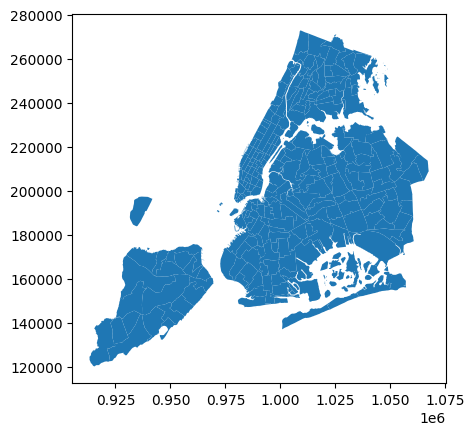

In [50]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [51]:
# Merge zones and trip records using locationID and PULocationID
merged_df = df.merge(zones, left_on='PULocationID', right_on='LocationID')



**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [52]:
# Group data by location and calculate the number of trips
trip_counts = merged_df.groupby('LocationID').size().reset_index(name='trip_count')



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [53]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_counts = zones.merge(trip_counts, on='LocationID', how='left')
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)




The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [54]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it
zones_with_counts.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of Pickups by Zone", 'orientation': "vertical"},
    cmap='OrRd',  # Or choose another colormap like 'YlGnBu', 'viridis', etc.
    edgecolor='black'
)
plt.title("NYC Taxi Pickups by Zone")
plt.axis('off')  # Optional: turn off axis
plt.show()


In [55]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_counts[['zone', 'borough', 'trip_count']].sort_values(by='trip_count', ascending=False).head(10)


zone    borough  trip_count
131                   JFK Airport     Queens     96753.0
236         Upper East Side South  Manhattan     86904.0
160                Midtown Center  Manhattan     85948.0
235         Upper East Side North  Manhattan     77516.0
161                  Midtown East  Manhattan     65633.0
137             LaGuardia Airport     Queens     64167.0
185  Penn Station/Madison Sq West  Manhattan     63469.0
229     Times Sq/Theatre District  Manhattan     61314.0
141           Lincoln Square East  Manhattan     60886.0
169                   Murray Hill  Manhattan     54491.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

*Speed* on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [56]:
# Find routes which have the slowest speeds at different times of the day

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['hour'] = df['tpep_pickup_datetime'].dt.hour

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

df_filtered = df[(df['trip_duration'] > 0) & (df['trip_distance'] > 0)]

df_filtered['route'] = df_filtered['PULocationID'].astype(str) + '_' + df_filtered['DOLocationID'].astype(str)

route_hour_grouped = df_filtered.groupby(['route', 'hour']).agg({
    'trip_distance': 'sum',
    'trip_duration': 'mean',
    'PULocationID': 'count'  # for trip count per route/hour
}).rename(columns={'PULocationID': 'trip_count'}).reset_index()

route_hour_grouped['avg_speed_mph'] = route_hour_grouped['trip_distance'] / route_hour_grouped['trip_duration']

slowest_routes_by_hour = route_hour_grouped.sort_values(by='avg_speed_mph').head(10)

print(slowest_routes_by_hour)



<ipython-input-56-0fb1ec150289>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['route'] = df_filtered['PULocationID'].astype(str) + '_' + df_filtered['DOLocationID'].astype(str)


          route  hour  trip_distance  trip_duration  trip_count  avg_speed_mph
72200    232_65    13           0.49      92.040556           1       0.005324
84141   243_264    17           0.18      23.159167           1       0.007772
29477   142_142     5           0.56      23.559167           1       0.023770
90542   258_258     1           0.02       0.762500           1       0.026230
1947      100_7     8           0.22       5.573889           1       0.039470
99060     40_65    21           1.12      23.907222           1       0.046848
5993    113_235    22           0.28       5.820556           1       0.048105
58303   194_194    16           0.01       0.204444           1       0.048913
102962    45_45    10           0.05       0.840556           1       0.059484
96701   264_168    23           1.36      19.001667           1       0.071573


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [57]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = df.groupby('hour').size()

# Plot
trips_per_hour.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

# Busiest hour
busiest_hour = trips_per_hour.idxmax()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [58]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1
estimated_total_trips = trips_per_hour / sample_fraction



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [60]:
# Compare traffic trends for the week days and weekends

df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['weekday'] = df['pickup_datetime'].dt.dayofweek  # 0 = Monday, ..., 6 = Sunday
df['weekend'] = df['weekday'].isin([5,6])  # Saturday, Sunday

weekday_vs_weekend = df.groupby(['hour', 'weekend']).size().unstack().fillna(0)

weekday_vs_weekend.plot(figsize=(10,6))
plt.title('Weekday vs Weekend Hourly Trip Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.legend(['Weekday', 'Weekend'])
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [61]:
# Find top 10 pickup and dropoff zones

top_pu = df['PULocationID'].value_counts().head(10)
top_do = df['DOLocationID'].value_counts().head(10)


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [62]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

zone_counts = pd.DataFrame({'pickup': pickup_counts, 'dropoff': dropoff_counts}).fillna(0)
zone_counts['ratio'] = zone_counts['pickup'] / (zone_counts['dropoff'] + 1)

top_ratio = zone_counts.sort_values('ratio', ascending=False).head(10)
bottom_ratio = zone_counts.sort_values('ratio', ascending=True).head(10)


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [65]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones

night_df = df[(df['hour'] >= 23) | (df['hour'] <= 5)]

# Note that the top zones should be of night hours and not the overall top zones


top_night_pickups = night_df['PULocationID'].value_counts().head(10)
top_night_dropoffs = night_df['DOLocationID'].value_counts().head(10)



**Now**, let us find the revenue share for the night time hours and the day

---

time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [66]:
# Filter for night hours (11 PM to 5 AM)
df['hour'] = df['tpep_pickup_datetime'].dt.hour

night_hours = [23, 0, 1, 2, 3, 4, 5]
df['is_night'] = df['hour'].isin(night_hours)

revenue_by_time = df.groupby('is_night')['total_amount'].sum()

total_revenue = revenue_by_time.sum()
night_share = revenue_by_time[True] / total_revenue
day_share = revenue_by_time[False] / total_revenue

print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2%}")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_share:.2%}")



Nighttime Revenue Share (11 PM - 5 AM): 12.09%
Daytime Revenue Share (6 AM - 10 PM): 87.91%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [67]:
# Analyse the fare per mile per passenger for different passenger counts

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance'].replace(0, np.nan)
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count'].replace(0, np.nan)

fare_per_mile_passenger = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print(fare_per_mile_passenger)



passenger_count
0.0          NaN
1.0    10.906119
2.0     6.431478
3.0     3.907948
4.0     4.348044
5.0     1.709633
6.0     1.350658
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [68]:
# Compare the average fare per mile for different days and for different times of the day
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].dt.hour

fare_day = df.groupby('day_of_week')['fare_per_mile'].mean().sort_index()

fare_hour = df.groupby('hour')['fare_per_mile'].mean()

print(fare_day)
print(fare_hour)



day_of_week
Friday       10.902254
Monday       10.990761
Saturday     10.923851
Sunday       12.525479
Thursday     11.267967
Tuesday      11.386546
Wednesday    11.112603
Name: fare_per_mile, dtype: float64
hour
0     10.525116
1     11.265323
2      9.938630
3     10.867087
4     13.996297
5     14.236772
6     11.254426
7     10.285299
8     10.390574
9     10.390779
10    10.694478
11    10.971512
12    12.058221
13    12.012318
14    11.605891
15    12.506631
16    13.910197
17    11.956122
18    11.540201
19    11.613681
20     9.584013
21     9.516502
22    10.153752
23    10.728780
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [69]:
# Compare fare per mile for different vendors
fare_vendor = df.groupby('VendorID')['fare_per_mile'].mean()
print(fare_vendor)



VendorID
1     8.126564
2    12.401494
Name: fare_per_mile, dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [70]:
# Defining distance tiers
def distance_tier(dist):
    if dist < 2:
        return 'Short'
    elif dist < 10:
        return 'Medium'
    else:
        return 'Long'

df['distance_tier'] = df['trip_distance'].apply(distance_tier)





```
# This is formatted as code
```

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [71]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percentage'] = 100 * df['tip_amount'] / df['fare_amount'].replace(0, np.nan)

tip_analysis = df.groupby(['distance_tier', 'passenger_count'])['tip_percentage'].mean()

tip_by_hour = df.groupby('hour')['tip_percentage'].mean()

print(tip_analysis)
print(tip_by_hour)



distance_tier  passenger_count
Long           0.0                15.335849
               1.0                16.146609
               2.0                15.444828
               3.0                14.477485
               4.0                13.132797
               5.0                16.416347
               6.0                16.675711
Medium         0.0                17.821442
               1.0                19.309008
               2.0                18.243428
               3.0                17.390568
               4.0                16.037113
               5.0                18.430180
               6.0                18.665229
Short          0.0                21.423783
               1.0                24.542945
               2.0                23.182833
               3.0                20.988027
               4.0                19.328059
               5.0                22.520685
               6.0                22.391496
Name: tip_percentage, dtype: float64
hour
0  

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [72]:
# See how passenger count varies across hours and days


low_tips = df[df['tip_percentage'] < 10]
high_tips = df[df['tip_percentage'] > 25]

print("Low tips avg passenger count:", low_tips['passenger_count'].mean())
print("High tips avg passenger count:", high_tips['passenger_count'].mean())



Low tips avg passenger count: 1.4071379363528866
High tips avg passenger count: 1.3477837889432356


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [73]:
# How does passenger count vary across zones

passenger_hour = df.groupby('hour')['passenger_count'].mean()
passenger_day = df.groupby('day_of_week')['passenger_count'].mean()

print(passenger_hour)
print(passenger_day)


hour
0     1.417124
1     1.420965
2     1.435521
3     1.442964
4     1.392857
5     1.283405
6     1.238054
7     1.258579
8     1.274402
9     1.298069
10    1.335685
11    1.346777
12    1.363848
13    1.366426
14    1.373793
15    1.390881
16    1.389004
17    1.376160
18    1.363099
19    1.376529
20    1.385196
21    1.414060
22    1.417879
23    1.410511
Name: passenger_count, dtype: float64
day_of_week
Friday       1.383778
Monday       1.344900
Saturday     1.463302
Sunday       1.447392
Thursday     1.327240
Tuesday      1.317241
Wednesday    1.313637
Name: passenger_count, dtype: float64


In [74]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

NameError: name 'zones_with_trips' is not defined



```
# This is formatted as code
```

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [76]:
# How often is each surcharge applied?
surcharges = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

for charge in surcharges:
    freq = (df[charge] > 0).mean() * 100
    print(f"Percentage of trips with {charge}: {freq:.2f}%")



Percentage of trips with extra: 61.94%
Percentage of trips with mta_tax: 99.07%
Percentage of trips with improvement_surcharge: 99.96%
Percentage of trips with congestion_surcharge: 92.32%
Percentage of trips with airport_fee: 8.78%


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>

> *Insight*:

Fare per mile per passenger decreases as passenger count increases (economies of scale).

Nighttime hours show different tipping and fare patterns than daytime.

Zones with higher passenger counts may represent busy hubs where cab supply should be prioritized.

Surcharges are common but concentrated in specific zones/times.

Trip distance tiers influence tipping behavior and fare per mile.


> *Recommendation*

Optimize cab dispatch by focusing on high-demand zones during peak and night hours.

Dynamic pricing can be implemented considering trip distance tiers, passenger counts, and time of day to maximize revenue.

Improve customer experience by incentivizing tipping during short or low-tip trips via targeted promotions.

Monitor and adjust extra charges and surcharges based on zones and times to ensure transparency and customer satisfaction.

Use data to balance supply and demand, reducing wait times and improving revenue per trip.




Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

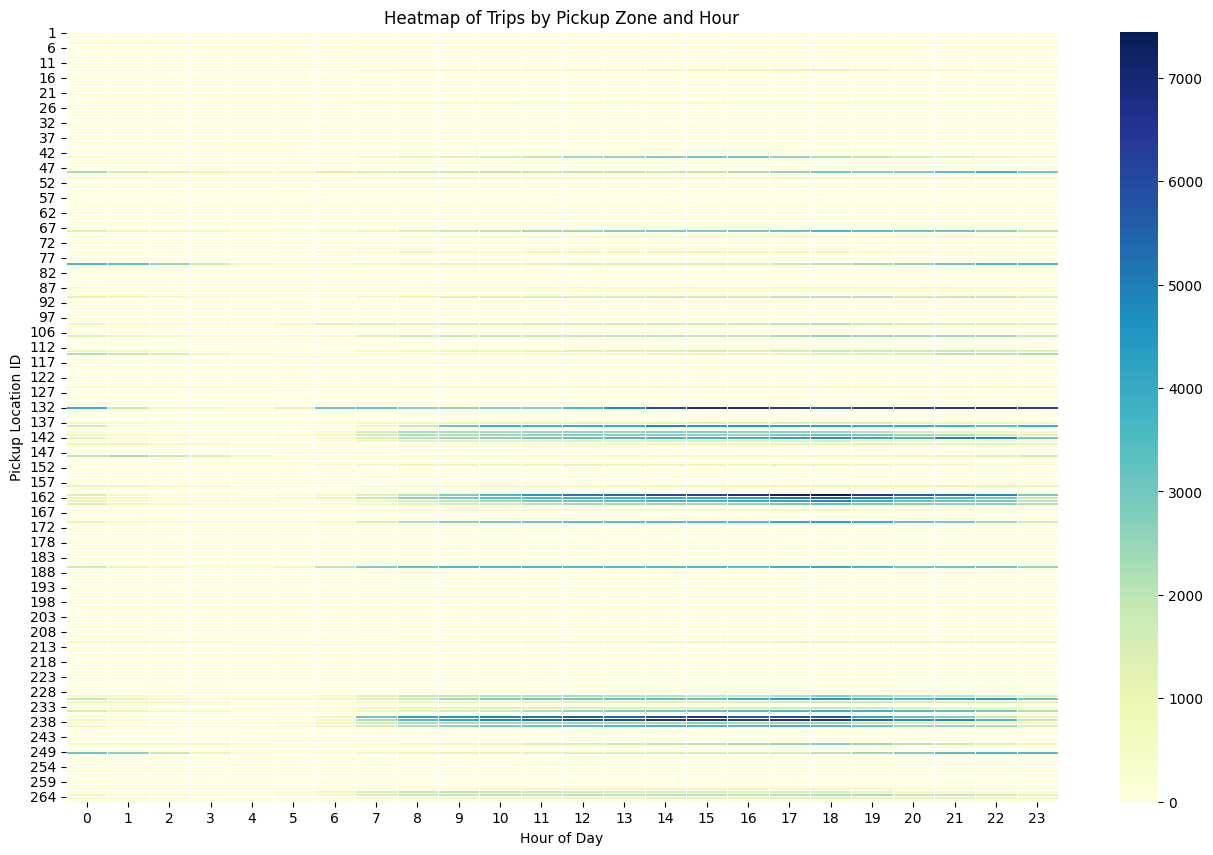

In [77]:
trips_by_zone_hour = df.groupby(['PULocationID', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(trips_by_zone_hour, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Trips by Pickup Zone and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Location ID')
plt.show()

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [78]:

# Define tiered pricing rules based on trip_distance (miles)
def tiered_pricing(distance, base_fare=2.5):
    if distance <= 2:
        return base_fare + distance * 2.5  # short trip rate
    elif distance <= 10:
        return base_fare + distance * 2.0  # medium trip rate
    else:
        return base_fare + distance * 1.5  # long trip rate

# Define surge multiplier by hour (higher multiplier during peak hours)
def surge_multiplier(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:  # Morning and evening rush
        return 1.5
    elif 22 <= hour <= 23 or 0 <= hour <= 4:  # Late night
        return 1.2
    else:
        return 1.0

# Calculate new fare column applying tiered pricing and surge multiplier
df['base_fare_calc'] = df['trip_distance'].apply(tiered_pricing)
df['surge'] = df['hour'].apply(surge_multiplier)
df['adjusted_fare'] = df['base_fare_calc'] * df['surge']

# Show some sample rows
print(df[['trip_distance', 'hour', 'base_fare_calc', 'surge', 'adjusted_fare']].head())


   trip_distance  hour  base_fare_calc  surge  adjusted_fare
0           7.74     0           17.98    1.2         21.576
1           1.24     0            5.60    1.2          6.720
2           1.44     0            6.10    1.2          7.320
3           0.54     0            3.85    1.2          4.620
5           7.10     0           16.70    1.2         20.040
